# WeatherPy

In [2]:
import sys
sys.path.append("..")

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
WeatherPy = pd.read_csv('output_data/cities.csv',index_col='City')
WeatherPy.reset_index(inplace=True)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
WeatherPy

,City,City_ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,0,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,1,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,2,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,3,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,4,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,yabrud,543,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,paraiso,544,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,veraval,545,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,novyy urgal,546,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [5]:
import pprint 

In [6]:
url = "https://api.openweathermap.org/data/2.5/weather"

# use iterrows to iterate through pandas dataframe
for index, row in WeatherPy.iterrows():
    
    params = {
    "appid": weather_api_key,
}

    # get city name from df
    city_name = row['City']

    # add keyword to params dict
    params['q'] = city_name

    # assemble url and make API request
    response = requests.get(url, params=params).json()
    
    #pprint.pprint(response)
    
    try:
        print(f"Processing Record {index} | {city_name}")
        
        # extract results
        results = response["name"]
     
    except (KeyError, IndexError):
        print("City not found... skipping.")

Processing Record 0 | ostrovnoy
Processing Record 1 | mahebourg
Processing Record 2 | qaanaaq
Processing Record 3 | zhuhai
Processing Record 4 | cape town
Processing Record 5 | atuona
Processing Record 6 | flinders
Processing Record 7 | opuwo
Processing Record 8 | tiksi
Processing Record 9 | pushkinskiye gory
Processing Record 10 | aykhal
Processing Record 11 | castro
Processing Record 12 | avarua
Processing Record 13 | saskylakh
Processing Record 14 | constitucion
Processing Record 15 | albany
Processing Record 16 | vilyuysk
Processing Record 17 | ushuaia
Processing Record 18 | bambous virieux
Processing Record 19 | kodinsk
Processing Record 20 | teknaf
Processing Record 21 | busselton
Processing Record 22 | ambon
Processing Record 23 | maragogi
Processing Record 24 | fallon
Processing Record 25 | kantang
Processing Record 26 | colonelganj
Processing Record 27 | punta arenas
Processing Record 28 | rikitea
Processing Record 29 | new norfolk
Processing Record 30 | gobabis
Processing Rec

Processing Record 249 | lebu
Processing Record 250 | port lincoln
Processing Record 251 | leningradskiy
Processing Record 252 | kajaani
Processing Record 253 | murray bridge
Processing Record 254 | rocha
Processing Record 255 | tagusao
Processing Record 256 | cobija
Processing Record 257 | port-gentil
Processing Record 258 | te anau
Processing Record 259 | hami
Processing Record 260 | pahrump
Processing Record 261 | fort frances
Processing Record 262 | umtata
Processing Record 263 | markova
Processing Record 264 | saint-leu
Processing Record 265 | jalu
Processing Record 266 | alice springs
Processing Record 267 | zaraza
Processing Record 268 | dingle
Processing Record 269 | bodden town
Processing Record 270 | griffith
Processing Record 271 | coihaique
Processing Record 272 | sao felix do xingu
Processing Record 273 | santa rosa
Processing Record 274 | goderich
Processing Record 275 | vila velha
Processing Record 276 | rabo de peixe
Processing Record 277 | soyo
Processing Record 278 | c

Processing Record 496 | chernaya kholunitsa
Processing Record 497 | havelock
Processing Record 498 | traverse city
Processing Record 499 | champoton
Processing Record 500 | mandalgovi
Processing Record 501 | delemont
Processing Record 502 | chauk
Processing Record 503 | kambove
Processing Record 504 | tutoia
Processing Record 505 | touros
Processing Record 506 | babati
Processing Record 507 | graaff-reinet
Processing Record 508 | noumea
Processing Record 509 | pilot butte
Processing Record 510 | atar
Processing Record 511 | valenca do piaui
Processing Record 512 | natchez
Processing Record 513 | denpasar
Processing Record 514 | loikaw
Processing Record 515 | madaoua
Processing Record 516 | malindi
Processing Record 517 | along
Processing Record 518 | bonito
Processing Record 519 | saint anthony
Processing Record 520 | high prairie
Processing Record 521 | high rock
Processing Record 522 | raudeberg
Processing Record 523 | kununurra
Processing Record 524 | mogadishu
Processing Record 525

## Convert Raw Data to DataFrame

In [6]:
city_data = WeatherPy.loc[:,["City","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed","Country", "Date"]]
city_data["Lat"] = city_data["Lat"].map("{:,.2f}".format)
city_data["Lng"] = city_data["Lng"].map("{:,.2f}".format)
city_data["Max Temp"] = city_data["Max Temp"].map("{:,.2f}".format)
city_data["Wind Speed"] = city_data["Wind Speed"].map("{:,.2f}".format)
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755
...,...,...,...,...,...,...,...,...,...
543,yabrud,33.97,36.66,80.60,32,0,8.05,SY,1558378840
544,paraiso,24.01,-104.61,84.20,4,5,16.11,MX,1558378898
545,veraval,49.65,0.71,61.00,62,0,8.05,FR,1558378898
546,novyy urgal,51.07,132.56,49.74,93,100,2.68,RU,1558378899


In [10]:
city_data['Date'] = pd.to_datetime(city_data['Date']).dt.date

In [11]:
print(city_data.describe(include='all'))  

            City   Lat     Lng Max Temp    Humidity  Cloudiness Wind Speed  \
count        548   548     548      548  548.000000  548.000000        548   
unique       548   532     543      261         NaN         NaN        251   
top     zhigansk  0.12  115.24    59.00         NaN         NaN       6.93   
freq           1     2       2       13         NaN         NaN         27   
mean         NaN   NaN     NaN      NaN   67.671533   49.405109        NaN   
std          NaN   NaN     NaN      NaN   23.697626   36.914201        NaN   
min          NaN   NaN     NaN      NaN    4.000000    0.000000        NaN   
25%          NaN   NaN     NaN      NaN   52.000000   13.750000        NaN   
50%          NaN   NaN     NaN      NaN   71.000000   46.500000        NaN   
75%          NaN   NaN     NaN      NaN   86.000000   81.000000        NaN   
max          NaN   NaN     NaN      NaN  290.000000  100.000000        NaN   

       Country        Date  
count      544         548  
uniqu

### Inspect the data and remove the cities where the humidity > 100%.

In [12]:
high_humidity= city_data.loc[city_data["Humidity"]>100]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
129,paita,-5.09,-81.11,62.60,290,0,17.22,PE,1970-01-01


In [13]:
stand_humidity=city_data.loc[city_data["Humidity"]<100]
stand_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1970-01-01
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1970-01-01
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1970-01-01
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1970-01-01
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1970-01-01
...,...,...,...,...,...,...,...,...,...
543,yabrud,33.97,36.66,80.60,32,0,8.05,SY,1970-01-01
544,paraiso,24.01,-104.61,84.20,4,5,16.11,MX,1970-01-01
545,veraval,49.65,0.71,61.00,62,0,8.05,FR,1970-01-01
546,novyy urgal,51.07,132.56,49.74,93,100,2.68,RU,1970-01-01


In [25]:
stand_humidity.min()

City            abonnema
Lat                -0.39
Lng                -0.29
Max Temp          100.14
Humidity               4
Cloudiness             0
Wind Speed          0.54
Date          1970-01-01
dtype: object

## Plotting the Data

### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

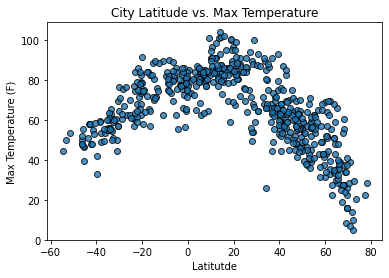

In [14]:
plt.scatter(     
    WeatherPy["Lat"],
    WeatherPy["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitutde")
plt.ylabel("Max Temperature (F)")

#### The code is analyzing the relationship between city latitude and max temperature. We find that as latitude increases away from the equator, the max temperature decreases. 

### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity %')

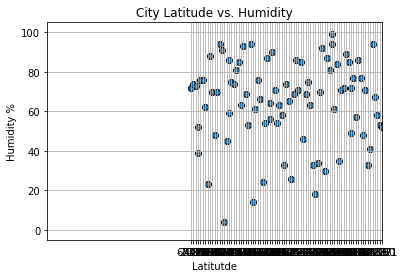

In [22]:
plt.scatter(     
    stand_humidity["Lat"],
    stand_humidity["Humidity"],
    edgecolor="black"
)

#set axis limit
plt.ylim(-5,105)
plt.xlim(-60,80)

plt.grid(linestyle='-')

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitutde")
plt.ylabel("Humidity %")

#### The code is analyzing the relationship between city latitude and humidity. We find that there is no direct relationship between latitude and humidity, as data across several points of latitude have 100% humidity.

### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

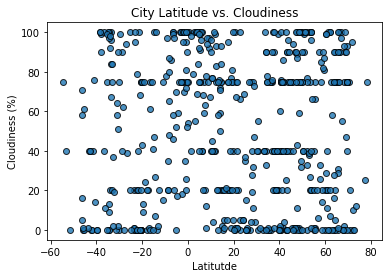

In [14]:
plt.scatter(     
    WeatherPy["Lat"],
    WeatherPy["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness (%)")

#### The code is analyzing the relationship between city latitude and cloudiness. We find that there is no direct relationship between latitude and cloudiness, as data across several points of latitude have anywhere from 0-100% cloudiness.

### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

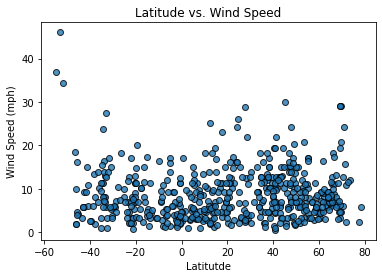

In [25]:
plt.scatter(     
    WeatherPy["Lat"],
    WeatherPy["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (mph)")

#### The code is analyzing the relationship between city latitude and wind speed. We find that wind speed remains relatively consistent, predominantly in the range of 0-10 mph, across all latitudes.

## Linear Regression

In [16]:
#Seperate out northen hemisphere and southern hemisphere
south_hem = WeatherPy.loc[WeatherPy["Lat"] <0]
north_hem = WeatherPy.loc[WeatherPy["Lat"] >0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6644951847801386


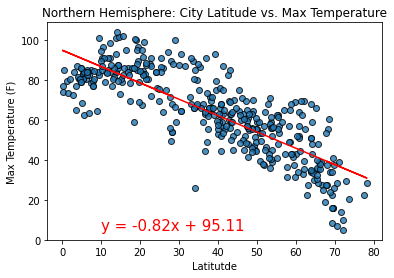

In [17]:
plt.scatter(     
    north_hem["Lat"],
    north_hem["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel("Latitutde")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Max Temp"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5780003690343855


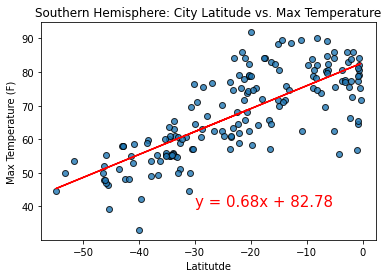

In [18]:
plt.scatter(     
    south_hem["Lat"],
    south_hem["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel("Latitutde")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Max Temp"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

#### In the northern hemisphere, Max Temp vs. Latitude has a strong negative correlation.
#### In the southern hemisphere, Max Temp vs. Latitude has a moderate positive correlation.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010729512501511098


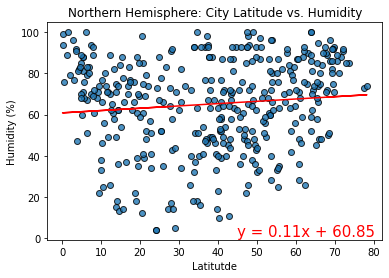

In [19]:
plt.scatter(     
    north_hem["Lat"],
    north_hem["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)
plt.title("Northern Hemisphere: City Latitude vs. Humidity")
plt.xlabel("Latitutde")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Humidity"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,1),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.021578062952091134


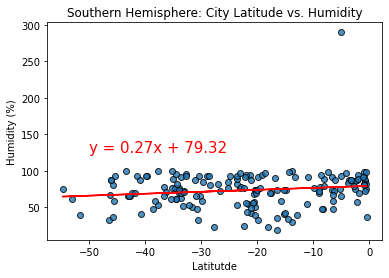

In [20]:
plt.scatter(     
    south_hem["Lat"],
    south_hem["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)
plt.title("Southern Hemisphere: City Latitude vs. Humidity")
plt.xlabel("Latitutde")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Humidity"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,125),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

#### In the northern hemisphere, Humidity (%) vs. Latitude has no correlation.
#### In the southern hemisphere, Humidity (%) vs. Latitude has a weak correlation.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.010729512501511098


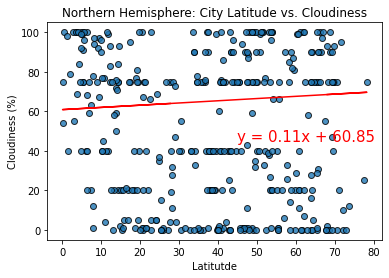

In [21]:
plt.scatter(     
    north_hem["Lat"],
    north_hem["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Humidity"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45, 45),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.021578062952091134


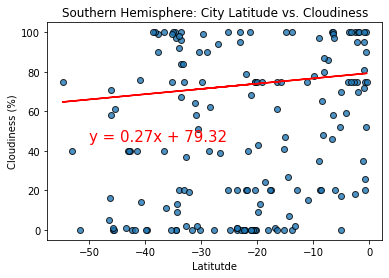

In [22]:
plt.scatter(     
    south_hem["Lat"],
    south_hem["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Humidity"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

#### In the northern hemisphere, Cloudiness (%) vs. Latitude has no correlation.
#### In the southern hemisphere, Cloudiness (%) vs. Latitude has no correlation.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011478610492563561


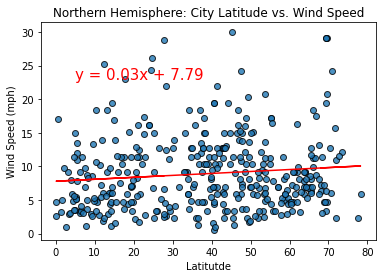

In [23]:
plt.scatter(     
    north_hem["Lat"],
    north_hem["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Wind Speed"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,23),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10399533504138529


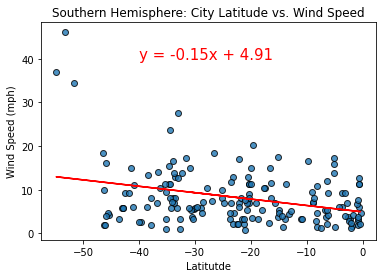

In [24]:
plt.scatter(     
    south_hem["Lat"],
    south_hem["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Wind Speed"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

#### In the northern hemisphere, Wind Speed (mph) vs. Latitude has no correlation.
#### In the southern hemisphere, Wind Speed (mph) vs. Latitude has a weak correlation.